In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy.stats import linregress
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

import math
import warnings

sns.set_style("dark")
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [32]:
df = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls', encoding = "ISO-8859-1", skiprows=4)
df = df.drop(df.index[348:])
df.count()

City                                      348
Population                                348
Violent\ncrime                            348
Murder and\nnonnegligent\nmanslaughter    348
Rape\n(revised\ndefinition)1                0
Rape\n(legacy\ndefinition)2               348
Robbery                                   348
Aggravated\nassault                       348
Property\ncrime                           348
Burglary                                  348
Larceny-\ntheft                           348
Motor\nvehicle\ntheft                     348
Arson3                                    187
dtype: int64

In [33]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan
4,Albion Village,6388.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan


In [36]:
df.fillna(df.mean(),inplace=True)

In [37]:
df.describe

<bound method NDFrame.describe of                            City  Population  Violent\ncrime  \
0                 Adams Village    1861.000           0.000   
1      Addison Town and Village    2577.000           3.000   
2                 Akron Village    2846.000           3.000   
3                        Albany   97956.000         791.000   
4                Albion Village    6388.000          23.000   
5                Alfred Village    4089.000           5.000   
6              Allegany Village    1781.000           3.000   
7                  Amherst Town  118296.000         107.000   
8            Amityville Village    9519.000           9.000   
9                     Amsterdam   18182.000          30.000   
10               Arcade Village    2053.000           0.000   
11              Ardsley Village    4523.000           5.000   
12            Asharoken Village     658.000           0.000   
13               Attica Village    2522.000           2.000   
14                   

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 347
Data columns (total 13 columns):
City                                    348 non-null object
Population                              348 non-null float64
Violent
crime                           348 non-null float64
Murder and
nonnegligent
manslaughter    348 non-null float64
Rape
(revised
definition)1              0 non-null float64
Rape
(legacy
definition)2               348 non-null float64
Robbery                                 348 non-null float64
Aggravated
assault                      348 non-null float64
Property
crime                          348 non-null float64
Burglary                                348 non-null float64
Larceny-
theft                          348 non-null float64
Motor
vehicle
theft                     348 non-null float64
Arson3                                  348 non-null float64
dtypes: float64(12), object(1)
memory usage: 38.1+ KB


In [39]:
df['population_square'] = df['Population'] * df['Population']
df['Robbery_new'] = np.where(df['Robbery']>0, 1, 0)
df['Burglary_new'] = np.where(df['Burglary']>0, 1, 0)
df['murder_new'] = np.where(df.iloc[:,3]>0, 1,0)

In [41]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,population_square,Robbery_new,Burglary_new,murder_new
0,Adams Village,1861.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000,3463321.000,0,1,0
1,Addison Town and Village,2577.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000,6640929.000,0,1,0
2,Akron Village,2846.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000,8099716.000,0,1,0
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,1.872,9595377936.000,1,1,1
4,Albion Village,6388.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,1.872,40806544.000,1,1,0


In [42]:
df.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3',
       'population_square', 'Robbery_new', 'Burglary_new', 'murder_new'],
      dtype='object')

In [44]:
regr = linear_model.LinearRegression()
Y = df['Property\ncrime'].values.reshape(-1, 1)
X = df[['Population','population_square','Robbery_new','Burglary_new','murder_new']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 3.46888670e-02 -2.11485349e-09 -8.58158838e+01 -7.90701331e+01
   1.48952757e+01]]

Intercept: 
 [-42.0253269]

R-squared:
0.9961302645639917


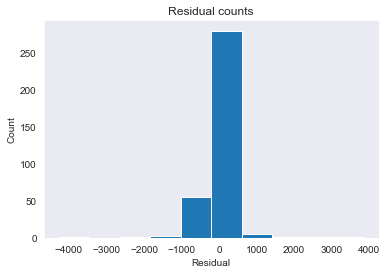

In [45]:
predicted = regr.predict(X).ravel()
actual = df['Property\ncrime']

residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

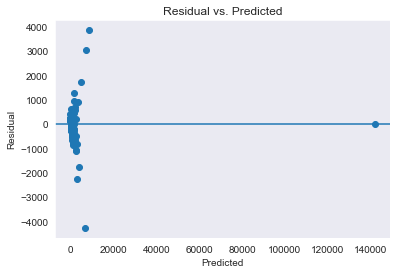

In [46]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()